## Joker Movie Sentiment Analysis

In [1]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\billy.sagala01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Preparation
### Getting The Authentication Credential

In [2]:
# initialize api instance
consumer_key = 'MLsdNl7mr9BOsXcjDkxJ3CWQo'
consumer_secret = 'ZONPHiccLDntsF3JAgApgjY7aPtCAYRMogp6V2T7JjlECyscyx'
access_token = '191425511-xwE7qOTDrdwUBsh5KhSFC9oO0t2LEB1kU4L4T405'
access_token_secret = 'X9yQ5FbTVwrhawnCym5AwhNss02lwlGdqQxVYQVHJpl66'

#Authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

### Getting The Tweet Data

In [3]:
#get tweet 
tweets = tp.Cursor(api.search,q="#JokerMovie",lang="en").items(500)
result = []
for tweet in  tweets :
    result.append(tweet)

In [6]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [7]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189751488710447104,RT @chasingmymind_: sad clown. #Joker \n#Joaqu...,2019-10-31 03:50:34,1,ClownMasky,180,Gotham City,"[{'text': 'Joker', 'indices': [31, 37]}, {'tex..."
1,1189751185076473856,"ONE DAY, I shall run this world.. Meowahahaha ...",2019-10-31 03:49:21,0,CatFrostbite,4,"San Francisco, CA","[{'text': 'SpookySZN', 'indices': [46, 56]}, {..."
2,1189751021909823490,RT @jokermovie: Submit your #JokerMovie inspir...,2019-10-31 03:48:42,1214,nctilichi,34,🐨💕,"[{'text': 'JokerMovie', 'indices': [28, 39]}]"
3,1189750960194818050,"RT @jokermovie: Director Todd Phillips, Joaqui...",2019-10-31 03:48:28,899,nctilichi,34,🐨💕,"[{'text': 'JokerMovie', 'indices': [110, 121]}..."
4,1189750873963974657,I voted on #GoSeeJoker via @TheTylt—#JokerMovi...,2019-10-31 03:48:07,0,Jered1O4,19,"Sundre, Alberta","[{'text': 'GoSeeJoker', 'indices': [11, 22]}, ..."


In [15]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [16]:
len(dataframe)

250

## Data Preprocessing

### Basic Text Preprocessing

#### 1. Lower Casing

In [17]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    rt @comicbook: #jokermovie's oscar campaign ha...
1    rt @paulaniedenthal: very scary bucky #jokermo...
2    @suhebzako the perspective of this art is abso...
3    rt @thejokerlines: “the worst part of having a...
4    rt @eddieholly: 2d and noodle as joker and har...
Name: text, dtype: object

#### 2. Punctuation Removal

In [18]:
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,rt comicbook jokermovies oscar campaign has be...
1,rt paulaniedenthal very scary bucky jokermovie...
2,suhebzako the perspective of this art is absol...
3,rt thejokerlines the worst part of having a me...
4,rt eddieholly 2d and noodle as joker and harle...


#### 3. Stopwords Removal

In [22]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head()

0    rt comicbook jokermovies oscar campaign begun ...
1    rt paulaniedenthal scary bucky jokermovie http...
2    suhebzako perspective art absolutely amazing j...
3    rt thejokerlines worst part mental illness peo...
4    rt eddieholly 2d noodle joker harley 2d noodle...
Name: text, dtype: object

#### 4. Frequent words Removal

In [23]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

jokermovie           210
rt                   116
joker                115
joaquinphoenix        24
movie                 24
via                   23
recordbreaking        21
goseejoker            21
thetyltjokermovie     21
voted                 21
dtype: int64

In [24]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    comicbook jokermovies oscar campaign begun htt...
1       paulaniedenthal scary bucky httpstcoudc4oiouen
2    suhebzako perspective art absolutely amazing t...
3    thejokerlines worst part mental illness people...
4    eddieholly 2d noodle harley 2d noodle gorillaz...
Name: text, dtype: object

### 5. Rare words removal

In [28]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

lantern               1
httpstcoerkubisutu    1
haha                  1
record                1
adhd                  1
gorillaz              1
missed                1
ashlewistattoo        1
jaredleto             1
httpstconkhlbqngnk    1
dtype: int64

In [29]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))
dataframe['text'].head()

0    comicbook jokermovies oscar campaign begun htt...
1       paulaniedenthal scary bucky httpstcoudc4oiouen
2    suhebzako perspective art absolutely amazing t...
3    thejokerlines worst part mental illness people...
4    eddieholly 2d noodle harley 2d noodle gorillaz...
Name: text, dtype: object

### 6. Spelling Correction

In [32]:
dataframe['text'][:5].apply(lambda x:str(TextBlob(x).correct()))

0    comicbook jokermovies oscar campaign begun htt...
1        paulaniedenthal scar lucky httpstcoudc4oiouen
2    suhebzako perspective art absolutely amazing t...
3    thejokerlines worst part mental illness people...
4    eddieholly d noble harley d noble gorillazfana...
Name: text, dtype: object

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\billy.sagala01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### 7. Tokenization

In [35]:
TextBlob(dataframe['text'][200]).words

WordList(['rachta_lin', 'watched', 'amp', 'felt', 'really', 'inspired', 'draw', 'something', 'great', 'typical', 'superhero'])

#### 8. Stemming

In [36]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [38]:
dataframe.head()

,text
0,comicbook jokermovi oscar campaign begun https...
1,paulaniedenth scari bucki httpstcoudc4oiouen
2,suhebzako perspect art absolut amaz true maste...
3,thejokerlin worst part mental ill peopl expect...
4,eddieholli 2d noodl harley 2d noodl gorillazfa...


### 9. Lematization

In [39]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    comicbook jokermovi oscar campaign begun https...
1         paulaniedenth scari bucki httpstcoudc4oiouen
2    suhebzako perspect art absolut amaz true maste...
3    thejokerlin worst part mental ill peopl expect...
4    eddieholli 2d noodl harley 2d noodl gorillazfa...
Name: text, dtype: object

In [40]:
dataframe.head()

,text
0,comicbook jokermovi oscar campaign begun https...
1,paulaniedenth scari bucki httpstcoudc4oiouen
2,suhebzako perspect art absolut amaz true maste...
3,thejokerlin worst part mental ill peopl expect...
4,eddieholli 2d noodl harley 2d noodl gorillazfa...


## Data Exploration

#### 1. Number of Word

In [42]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,comicbook jokermovi oscar campaign begun https...,7
1,paulaniedenth scari bucki httpstcoudc4oiouen,4
2,suhebzako perspect art absolut amaz true maste...,10
3,thejokerlin worst part mental ill peopl expect...,11
4,eddieholli 2d noodl harley 2d noodl gorillazfa...,10


#### 2. Number of Character

In [43]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,comicbook jokermovi oscar campaign begun https...,7,78
1,paulaniedenth scari bucki httpstcoudc4oiouen,4,44
2,suhebzako perspect art absolut amaz true maste...,10,68
3,thejokerlin worst part mental ill peopl expect...,11,64
4,eddieholli 2d noodl harley 2d noodl gorillazfa...,10,81


#### 3. Number of Stopwords

In [47]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.sort_values(by=['stopwords'], ascending = False).head()

,text,word_count,char_count,stopwords
218,realli good entir fuck that im gonna say,8,40,1
152,weaponxmetsu may late amaz big impact societi ...,10,62,1
197,cuddlyveedl mrj one disney princess he got ama...,11,90,1
195,leehunt3r perform absolut blown away that got ...,12,76,1
194,legomoviescen here behind scene shot murray fr...,11,69,1


#### 4. Number of Special Characters

In [49]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.sort_values(by=['hastags'], ascending = False).head()

,text,word_count,char_count,stopwords,hastags
0,comicbook jokermovi oscar campaign begun https...,7,78,0,0
171,felt romanc httpstcoi2iax4koxf,3,30,0,0
158,phoenix bring someth previou version human the...,10,63,0,0
159,use think life tragedi realis comedi halloween...,8,65,0,0
160,deserv hype httpstcojsanpanv92,3,30,0,0


## Labelling Using Polarity

#### Make new Dataframe

In [50]:
#new df after removed duplicate text
new_df = dataframe
new_df.head()

#sentiment labeling 
text = new_df.text

#### Labelling

In [51]:
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [53]:
new_df = new_df[['text','sentiment','sentimentclass']]

#### Data Grouping

In [54]:
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()
sentiment

sentimentclass
 Netral     155
Negative     29
Positive     66
Name: sentimentclass, dtype: int64

In [55]:
#dataframe for chart
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()


#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Netral,155,0.620
1,Negative,29,0.116
2,Positive,66,0.264


### Barchart

Text(0.5, 1.0, 'Sentiment Class')

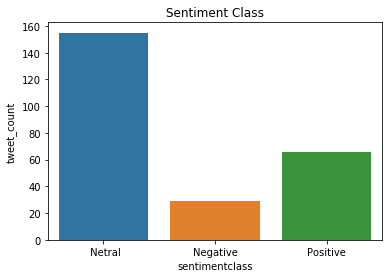

In [67]:
ax = sns.barplot(x = "sentimentclass", y = "tweet_count", data=chart)
ax.set_title('Sentiment Class')

### Wordcloud

In [69]:
#defining negative and positive
negative = new_df.loc[new_df['sentimentclass'] == "Negative"]
positive = new_df.loc[new_df['sentimentclass'] == "Positive"]

In [73]:
#tweet merging
all_description_negative = "".join(negative.text.values)
all_description_positive = "".join(positive.text.values)

In [79]:
#create wordcloud
from wordcloud import WordCloud, STOPWORDS

def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Wordcloud of Negative Tweet about #JokerMovie


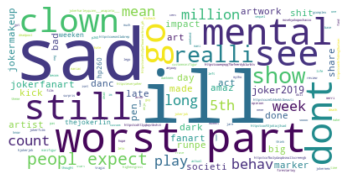

In [80]:
print("Wordcloud of Negative Tweet about #JokerMovie")

#happy 
create_word_cloud(all_description_negative)

Wordcloud of Positive Tweet about #JokerMovie


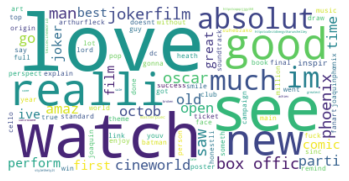

In [81]:
print("Wordcloud of Positive Tweet about #JokerMovie")

#happy 
create_word_cloud(all_description_positive)

## Feature Extraction

In [83]:
#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
count_vectorizer = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(stop_words='english')

## Modelling

### Train Test Split

In [87]:
X = new_df['text']
y = new_df['sentimentclass']

In [92]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)
#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)


In [93]:

from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

### Logistic Regression

In [94]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [95]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

### Naive Bayes

In [96]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [97]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

## Model Evaluation

### Logistic Regression

In [99]:
#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# using count vectorizer
print("______________ Countvectorizer ______________")


Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')

print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 99.00% & 66.00%
Precision train & test  : 99.00% & 66.00%
F1 Score train & test   : 99.00% & 66.00%


In [100]:
# using count vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 71.50% & 52.00%
Precision train & test  : 71.50% & 52.00%
F1 Score train & test   : 71.50% & 66.00%
